# Data Analysis Observations
# 1. The two drug regimens that seem to have made a positive effect in the treatment of the tumor on mice had a very similar average of the total tumor volume. Capomulin being at 40.68 and Ramicane being at 40.22.
# 2. There was more mice for the two drug regimens: Capomulin and Ramicane that seemed most effective. 
# 3. The total count of mice per gender was almost 50/50. 124 female mice and 125 male mice.
# 4. Infubinol seemed to be the only one with an outlier.
# 5. The longer in treatment the smaller the tumor volume.
# 6. Mouse weight correlated strongly with average tumor volume.


In [1]:
# Import dDependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Get the path to the data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata,study_results,on="Mouse ID", how="outer")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#Check the number of mice. Want to do unique so you do not get the duplicates
number_unique_mice=len(combined_data['Mouse ID'].unique())

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),'Mouse ID'].unique()

In [4]:
# Clean the data by removing the duplicates of mice
clean_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]

In [5]:
#Check the number of mice after dropping the duplicate
len_dropped_data=len(clean_df["Mouse ID"].unique())

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Do a groupby to get the statistical values of the tumor volume for each drug regimen

regime_group=clean_df.groupby('Drug Regimen')

regimen_mean=regime_group["Tumor Volume (mm3)"].mean()
# print(regimen_mean)
regimen_median=regime_group["Tumor Volume (mm3)"].median()
# print(regimen_median)
regimen_variance=regime_group["Tumor Volume (mm3)"].var()
# print(regimen_variance)
regimen_std_dev=regime_group["Tumor Volume (mm3)"].std()
# print(regimen_std_dev)
regimen_sem=regime_group["Tumor Volume (mm3)"].sem()
# print(regimen_sem)

#Create the Data Frame and display it
summary_statistics_df=pd.DataFrame({
    "Mean": regimen_mean, 
    "Median":regimen_median,
    "Variance": regimen_variance, 
    "Standard Deviation":regimen_std_dev, "SEM": regimen_sem })
summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#Use groupby to filter by the drug regimen group to find the total amount of mice per treatment
combined_group=combined_data.groupby('Drug Regimen')
count_makers = combined_group['Mouse ID'].count()

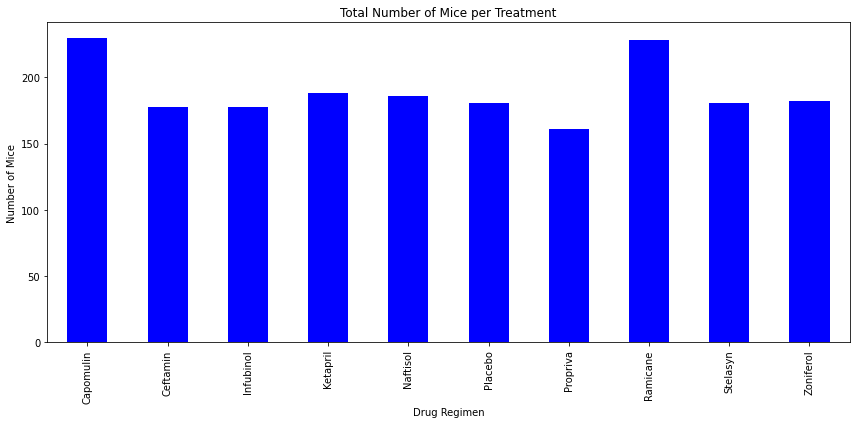

In [8]:
#Plot the bar plot for the total number of mice for each treatment throughout the course using pandas. Make sure to label it. 
bar_pandas=count_makers.plot(kind="bar", figsize=(12,6), color='b')
bar_pandas.set_ylabel("Number of Mice")
plt.title("Total Number of Mice per Treatment")
plt.tight_layout()
plt.show()

In [9]:
# number_of_mice = [Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Propriva, Ramicane, Stelasyn, Zoniferol]
x_axis = np.arange(len(count_makers))

tick_locations = [value for value in x_axis]

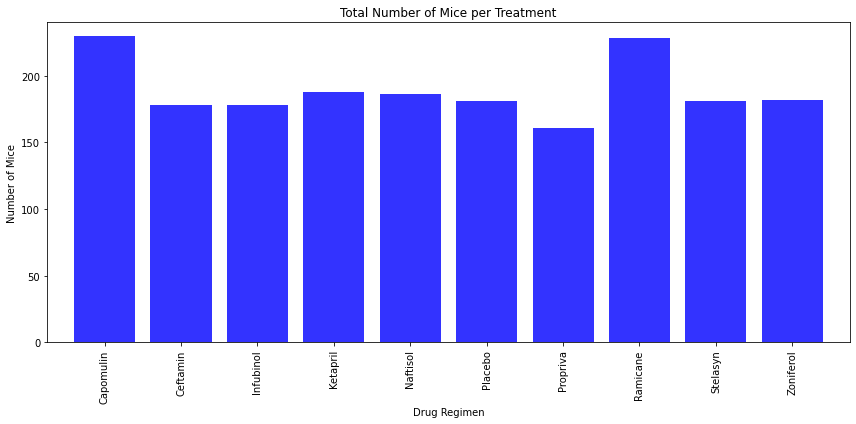

In [10]:
plt.figure(figsize=(12,6))
plt.bar(x_axis, count_makers, color='b', alpha=.80, align="center")
plt.xticks(tick_locations, ['Capomulin', 
                            'Ceftamin', 'Infubinol', 'Ketapril', 
                            'Naftisol', 'Placebo', 'Propriva', 
                            'Ramicane', 'Stelasyn', 'Zoniferol'] , rotation="vertical")
plt.xlim(-.75, len(x_axis)-.25)
plt.ylim(0, max(count_makers)+10)
# Set a Title and labels
plt.title("Total Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
# # Save our graph and show the grap
plt.tight_layout()
# plt.savefig("../Images/avg_state_rain.png")
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas.
# Group by gender (sex) and find unique to find the total number of male and female mice
gender_group = combined_data.groupby("Sex")
unique_gender_count = gender_group.nunique()["Mouse ID"]

In [12]:
total_mice=len(combined_data['Mouse ID'].unique())

In [13]:
gender_percent=(unique_gender_count/total_mice)*100

In [14]:
gender_df=pd.DataFrame({"Total Count": unique_gender_count, "Percentage of Gender":gender_percent})
gender_df.sort_values(["Total Count"], ascending = False).style.format({"Percentage of Gender":"{:.2f}%"})

,Total Count,Percentage of Gender
Sex,,
Male,125,50.20%
Female,124,49.80%


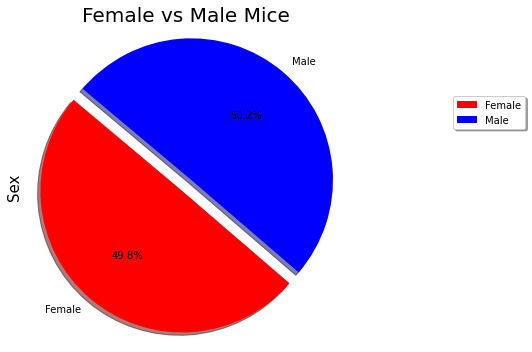

In [15]:
#Plot the pie chart using pandas
colors = ['red', 'blue']
explode = (0.1, 0)
gender_plot=gender_df.plot.pie(y= 'Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")
plt.axis("equal")
plt.title('Female vs Male Mice',fontsize = 20)
plt.ylabel('Sex',fontsize = 15)
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Create the lists of the values to create the pie plot
gender=['Female', 'Male']
percent = [49.8, 50.2]
colors = ['red', 'blue']
explode = (0.1,0)

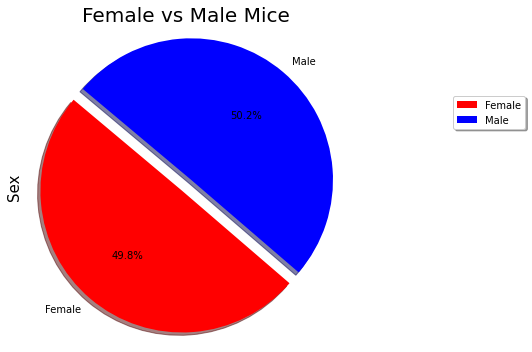

In [17]:
#Plot the pie chart
plt.pie(percent, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, )
plt.axis("equal")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Female vs Male Mice',fontsize = 20)
plt.ylabel('Sex',fontsize = 15)
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

## Quartiles, Outliers and Boxplots 

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
#First we will use loc to filter through the data set by the treatments
regimen_cap=combined_data.loc[combined_data['Drug Regimen']=="Capomulin",:]
regimen_ram=combined_data.loc[combined_data['Drug Regimen']=="Ramicane",:]
regimen_inf=combined_data.loc[combined_data['Drug Regimen']=="Infubinol",:]
regimen_cef=combined_data.loc[combined_data['Drug Regimen']=="Ceftamin",:]


In [19]:
#Group by the Mouse ID to be able to obtain the max of the timepoint of each sepific treatment 
group_capo=regimen_cap.groupby('Mouse ID')
last_vol_cap=group_capo['Timepoint'].max()

#Create your Data Frame of the max value
cap_tum_vol_df=pd.DataFrame(last_vol_cap)

#Merge the new data drame by the previous data set on Mouse ID and Timepoint and to get all the date of the Mouse ID since we want the treatment for each mice
cap_merge = pd.merge(cap_tum_vol_df, combined_data, on=('Mouse ID','Timepoint'), how='left')

#Use the new data frame to get the final total tumor volume for the specific treatment
cap_tum_vol=cap_merge['Tumor Volume (mm3)']

#Calculate the lower and upper quartile, interquartile and median. Then print out.
quartiles = cap_tum_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumor volume is: {lowerq}")
print(f"The upper quartile of Capomulin tumor volume is: {upperq}")
print(f"The interquartile range of Capomulin tumor volume is: {iqr}")
print(f"The median of Capomulin tumor value is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The median of Capomulin tumor value is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [20]:
#Group by the Mouse ID to be able to obtain the max of the timepoint of each sepific treatment 
group_ram=regimen_ram.groupby('Mouse ID')
last_vol_ram=group_ram['Timepoint'].max()

#Create your Data Frame of the max value
ram_tum_vol_df=pd.DataFrame(last_vol_ram)

#Merge the new data drame by the previous data set on Mouse ID and Timepoint and to get all the date of the Mouse ID since we want the treatment for each mice
ram_merge = pd.merge(ram_tum_vol_df, combined_data, on=('Mouse ID','Timepoint'), how='left')

#Use the new data frame to get the final total tumor volume for the specific treatment
ram_tum_vol=ram_merge['Tumor Volume (mm3)']

#Calculate the lower and upper quartile, interquartile and median. Then print out.
quartiles = ram_tum_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumor volume is: {lowerq}")
print(f"The upper quartile of Ramicane tumor volume is: {upperq}")
print(f"The interquartile range of Ramicane tumor volume is: {iqr}")
print(f"The median of Ramicane tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The median of Ramicane tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [21]:
#Repeat the same process as above
group_inf=regimen_inf.groupby('Mouse ID')
last_vol_inf=group_inf['Timepoint'].max()

inf_tum_vol_df=pd.DataFrame(last_vol_inf)

inf_merge = pd.merge(inf_tum_vol_df, combined_data, on=('Mouse ID','Timepoint'), how='left')

inf_tum_vol=inf_merge['Tumor Volume (mm3)']

quartiles = inf_tum_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumor volume is: {lowerq}")
print(f"The upper quartile of Infubinol tumor volume is: {upperq}")
print(f"The interquartile range of Infubinol tumor volume is: {iqr}")
print(f"The median of Infubinol tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
The median of Infubinol tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [22]:
#Repeat the same process as above
group_cef=regimen_cef.groupby('Mouse ID')
last_vol_cef=group_cef['Timepoint'].max()

cef_tum_vol_df=pd.DataFrame(last_vol_cef)

cef_merge = pd.merge(cef_tum_vol_df, combined_data, on=('Mouse ID','Timepoint'), how='left')

cef_tum_vol=cef_merge['Tumor Volume (mm3)']

quartiles = cef_tum_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumor volume is: {lowerq}")
print(f"The upper quartile of Ceftamin tumor volume is: {upperq}")
print(f"The interquartile range of Ceftamin tumor volume is: {iqr}")
print(f"The median of Ceftamin tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumor volume is: 48.72207785
The upper quartile of Ceftamin tumor volume is: 64.29983003
The interquartile range of Ceftamin tumor volume is: 15.577752179999997
The median of Ceftamin tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [23]:
#Create the list of the values of each tumor volume treatment & labels
boxplot_list=[cap_tum_vol,ram_tum_vol,inf_tum_vol,cef_tum_vol]
labels = ['Capomulin','Ramicane','Infubinol','Ceftamin']

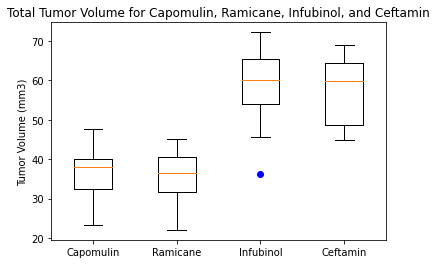

In [24]:
#Plot the boxplot
fig1, ax1 = plt.subplots()
ax1.boxplot(boxplot_list, labels=labels, sym='blue')
ax1.set_title('Total Tumor Volume for Capomulin, Ramicane, Infubinol, and Ceftamin')
ax1.set_ylabel('Tumor Volume (mm3)')
# ax1.set_xlabel('Capomulin','Ramicane','Infubinol','Ceftamin')
plt.show()

## Line and Scatter Plots

In [25]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Filter the data with loc to find the data of a specific mouse treated with Capomulin
capomulin_df = combined_data.loc[combined_data["Drug Regimen"]== "Capomulin",:]

In [26]:
unique_mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185",:]

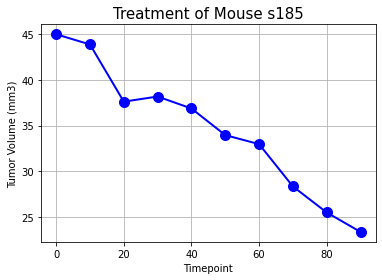

In [27]:
#Plot the line plot
x_axis = np.arange(0, 100, 10)
tumor_vol = unique_mouse_df["Tumor Volume (mm3)"]
plt.plot(x_axis, tumor_vol,linewidth=2, markersize=10,marker="o",color="blue")
plt.title('Treatment of Mouse s185',fontsize =15)
plt.xlabel('Timepoint',fontsize =10)
plt.ylabel('Tumor Volume (mm3)',fontsize =10)
plt.grid()

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

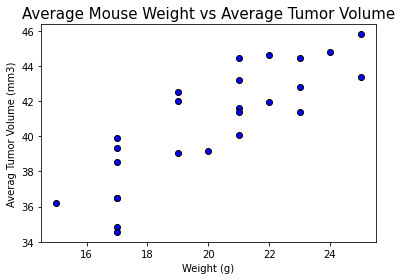

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Use group by calculate the average of the tumor volumen and weight for each mouse treated with Capomulin
avg_mouse_cap=capomulin_df.groupby(['Mouse ID']).mean()
avg_tum_vol=avg_mouse_cap['Tumor Volume (mm3)']
avg_weight_vol=avg_mouse_cap['Weight (g)']
#Plot the scatter plot
plt.scatter(avg_weight_vol, avg_tum_vol, marker="o", facecolors="blue", edgecolors="black")
plt.title('Average Mouse Weight vs Average Tumor Volume',fontsize =15)
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =10)

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#Use the correlation function. Print
correlation = st.pearsonr(avg_weight_vol,avg_tum_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.7088568047708717


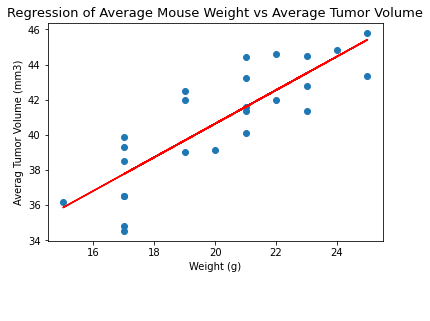

In [30]:
#List the values to be used to create the linear regression model
y_values=avg_mouse_cap['Tumor Volume (mm3)']
x_values=avg_mouse_cap['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the linear regression model
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Weight (g)', fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)', fontsize =10)
plt.title('Regression of Average Mouse Weight vs Average Tumor Volume',fontsize =13)
print(f"The r-squared is: {rvalue**2}")
plt.show()